# Tennis Stats Analysis
### Gideon Schmickle

This analysis focuses on the tennis_stats.csv data from Kaggle.

In this Analysis, I will be using a linear regression model to predict three different target variables:

- Wins
- Winnings
- Losses

In this notebook, one will find:

- An exploratory data analysis
- Correlation
- Model development
- Search for optimal predictors of model (based on the R^2 score)


In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

In [2]:
# import data
tennis_df = pd.read_csv("./tennis_stats.csv")

# EDA:

Investigate the data to see what relationships exist

In [3]:
pd.set_option('display.max_columns', None)
tennis_df.head()

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,BreakPointsOpportunities,BreakPointsSaved,DoubleFaults,ReturnGamesPlayed,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,7,0.43,2,9,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,0,0.57,1,9,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,8,0.40,1,19,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119
3,Rogerio Dutra Silva,2010,0.83,0.64,0.34,0.59,0.33,2,0.33,5,6,0.40,0,14,0.14,0.34,15,0.80,0.49,0.63,0,0,9761,125
4,Daniel Gimeno-Traver,2017,0.81,0.54,0.00,0.33,0.33,1,0.00,2,0,0.50,2,3,0.00,0.20,2,0.50,0.35,0.50,0,1,32879,272


# Column Breakdown:

## Identfying columns:
- Player: name of the tennis player

- Year: year data was recorded
 

## Predictors:
- Aces: number of serves by the player where the receiver does not touch the ball<br> 
- DoubleFaults: number of times player missed both first and second serve attempts<br>
- FirstServe: % of first-serve attempts made <br>
- FirstServePointsWon: % of first-serve attempt points won by the player
- SecondServePointsWon: % of second-serve attempt points won by the player
- BreakPointsFaced: number of times where the receiver could have won service game of the player
- BreakPointsSaved: % of the time the player was able to stop the receiver from winning service game when they had the chance
- ServiceGamesPlayed: total number of games where the player served
- ServiceGamesWon: total number of games where the player served and won
- TotalServicePointsWon: % of points in games where the player served that they won
- FirstServeReturnPointsWon: % of opponents first-serve points the player was able to win
- SecondServeReturnPointsWon: % of opponents second-serve points the player was able to win
- BreakPointsOpportunities: number of times where the player could have won the service game of the opponent
- BreakPointsConverted: % of the time the player was able to win their opponent’s service game when they had the chance
- ReturnGamesPlayed: total number of games where the player’s opponent served
- ReturnGamesWon: total number of games where the player’s opponent served and the player won
- ReturnPointsWon: total number of points where the player’s opponent served and the player won
  
- TotalPointsWon: % of points won by the player



## Targets:
- Wins: number of matches won in a year
- Losses: number of matches lost in a year
- Winnings: total winnings in USD($) in a year

- Ranking: ranking at end of year
 

In [4]:
tennis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1721 entries, 0 to 1720
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Player                      1721 non-null   object 
 1   Year                        1721 non-null   int64  
 2   FirstServe                  1721 non-null   float64
 3   FirstServePointsWon         1721 non-null   float64
 4   FirstServeReturnPointsWon   1721 non-null   float64
 5   SecondServePointsWon        1721 non-null   float64
 6   SecondServeReturnPointsWon  1721 non-null   float64
 7   Aces                        1721 non-null   int64  
 8   BreakPointsConverted        1721 non-null   float64
 9   BreakPointsFaced            1721 non-null   int64  
 10  BreakPointsOpportunities    1721 non-null   int64  
 11  BreakPointsSaved            1721 non-null   float64
 12  DoubleFaults                1721 non-null   int64  
 13  ReturnGamesPlayed           1721 

In [5]:
tennis_df[tennis_df.columns == tennis_df.isna()].count()

Player                        0
Year                          0
FirstServe                    0
FirstServePointsWon           0
FirstServeReturnPointsWon     0
SecondServePointsWon          0
SecondServeReturnPointsWon    0
Aces                          0
BreakPointsConverted          0
BreakPointsFaced              0
BreakPointsOpportunities      0
BreakPointsSaved              0
DoubleFaults                  0
ReturnGamesPlayed             0
ReturnGamesWon                0
ReturnPointsWon               0
ServiceGamesPlayed            0
ServiceGamesWon               0
TotalPointsWon                0
TotalServicePointsWon         0
Wins                          0
Losses                        0
Winnings                      0
Ranking                       0
dtype: int64

It appears that there are no null columns. We can continue on.

In [6]:
tennis_df.describe(include='all')

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,BreakPointsOpportunities,BreakPointsSaved,DoubleFaults,ReturnGamesPlayed,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
count,1721,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.00000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1.721000e+03,1721.000000
unique,438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Ivan Dodig,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2013.646717,0.598053,0.680738,0.261673,0.479733,0.466432,97.105171,0.369407,112.003486,102.918071,0.565386,49.112144,198.30796,0.173823,0.342208,197.650203,0.715590,0.473155,0.599245,7.876816,9.278908,2.344928e+05,269.610691
std,NaN,2.488018,0.054533,0.070422,0.056639,0.066902,0.068447,137.966077,0.162987,119.247651,122.761670,0.119426,56.630264,221.29607,0.080880,0.049369,221.208703,0.123287,0.037139,0.057718,10.183716,8.996450,2.530537e+05,277.341947
min,NaN,2009.000000,0.360000,0.270000,0.000000,0.060000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.220000,0.250000,0.000000,0.000000,1.080000e+02,3.000000
25%,NaN,2012.000000,0.570000,0.650000,0.240000,0.460000,0.440000,7.000000,0.320000,15.000000,9.000000,0.520000,6.000000,22.00000,0.130000,0.320000,22.000000,0.670000,0.460000,0.570000,0.000000,2.000000,4.931100e+04,83.000000
50%,NaN,2014.000000,0.600000,0.690000,0.270000,0.490000,0.480000,34.000000,0.380000,55.000000,41.000000,0.590000,23.000000,86.00000,0.180000,0.350000,86.000000,0.750000,0.480000,0.610000,3.000000,5.000000,1.252120e+05,166.000000
75%,NaN,2016.000000,0.630000,0.720000,0.290000,0.520000,0.500000,140.000000,0.430000,201.000000,172.000000,0.630000,80.000000,349.00000,0.220000,0.370000,348.000000,0.790000,0.500000,0.630000,13.000000,17.000000,3.500750e+05,333.000000


There are no negative values, which means we can be confident that there are no negative outliers that we will need to remove.

In [7]:
# separate columns into "iDs", "predictors", and "targets"
columns = tennis_df.columns
iDs = columns[:2]
predictors = columns[2:20]
targets = columns[20:]

In [8]:
# find the Pearson Correlation between the predictors and the targets
most_correlated = []

# for each target variable
for target in targets:

    # for each predictor in the predictors set
    for predictor in predictors:

        # get the correlation
        corr, en = pearsonr(tennis_df[target], tennis_df[predictor])

        # if the absolute correlation is greater than 0.7, then print it 
        if abs(corr) > 0.7:
            print("The correlation for {} and {} is {}.".format(target, predictor, corr))

            # check if the predictor is in our most_correlated list. If not, then append it.
            if predictor not in most_correlated:
                most_correlated.append(predictor)

The correlation for Wins and Aces is 0.8253011922488609.
The correlation for Wins and BreakPointsFaced is 0.8834699298437749.
The correlation for Wins and BreakPointsOpportunities is 0.9234533173669666.
The correlation for Wins and DoubleFaults is 0.8474593354009934.
The correlation for Wins and ReturnGamesPlayed is 0.9284076225806659.
The correlation for Wins and ServiceGamesPlayed is 0.9291525358241295.
The correlation for Losses and Aces is 0.7686283347845098.
The correlation for Losses and BreakPointsFaced is 0.9433086885312064.
The correlation for Losses and BreakPointsOpportunities is 0.9092952673707847.
The correlation for Losses and DoubleFaults is 0.8819221007707466.
The correlation for Losses and ReturnGamesPlayed is 0.9367552157905941.
The correlation for Losses and ServiceGamesPlayed is 0.9351823440696654.
The correlation for Winnings and Aces is 0.7984043540699406.
The correlation for Winnings and BreakPointsFaced is 0.8760356989199043.
The correlation for Winnings and Bre

According to the Pearson correlation, the Columns that are most correlated (with an absolute correlation above 0.7) are Aces, BreakPointsFaced, BreakPointsOpportunities, DoubleFaults, ReturnGamesPlayed, and ServiceGamesPlayed. However, it appears that Ranking does not have a high correlation with any variable. We will explore the other target variables for now.

In [9]:
# save most correlated predictors to list and drop "Ranking" from the target list as there is no highly correlated variable
print(most_correlated)
targets = targets.drop("Ranking")


['Aces', 'BreakPointsFaced', 'BreakPointsOpportunities', 'DoubleFaults', 'ReturnGamesPlayed', 'ServiceGamesPlayed']


<Figure size 640x480 with 0 Axes>

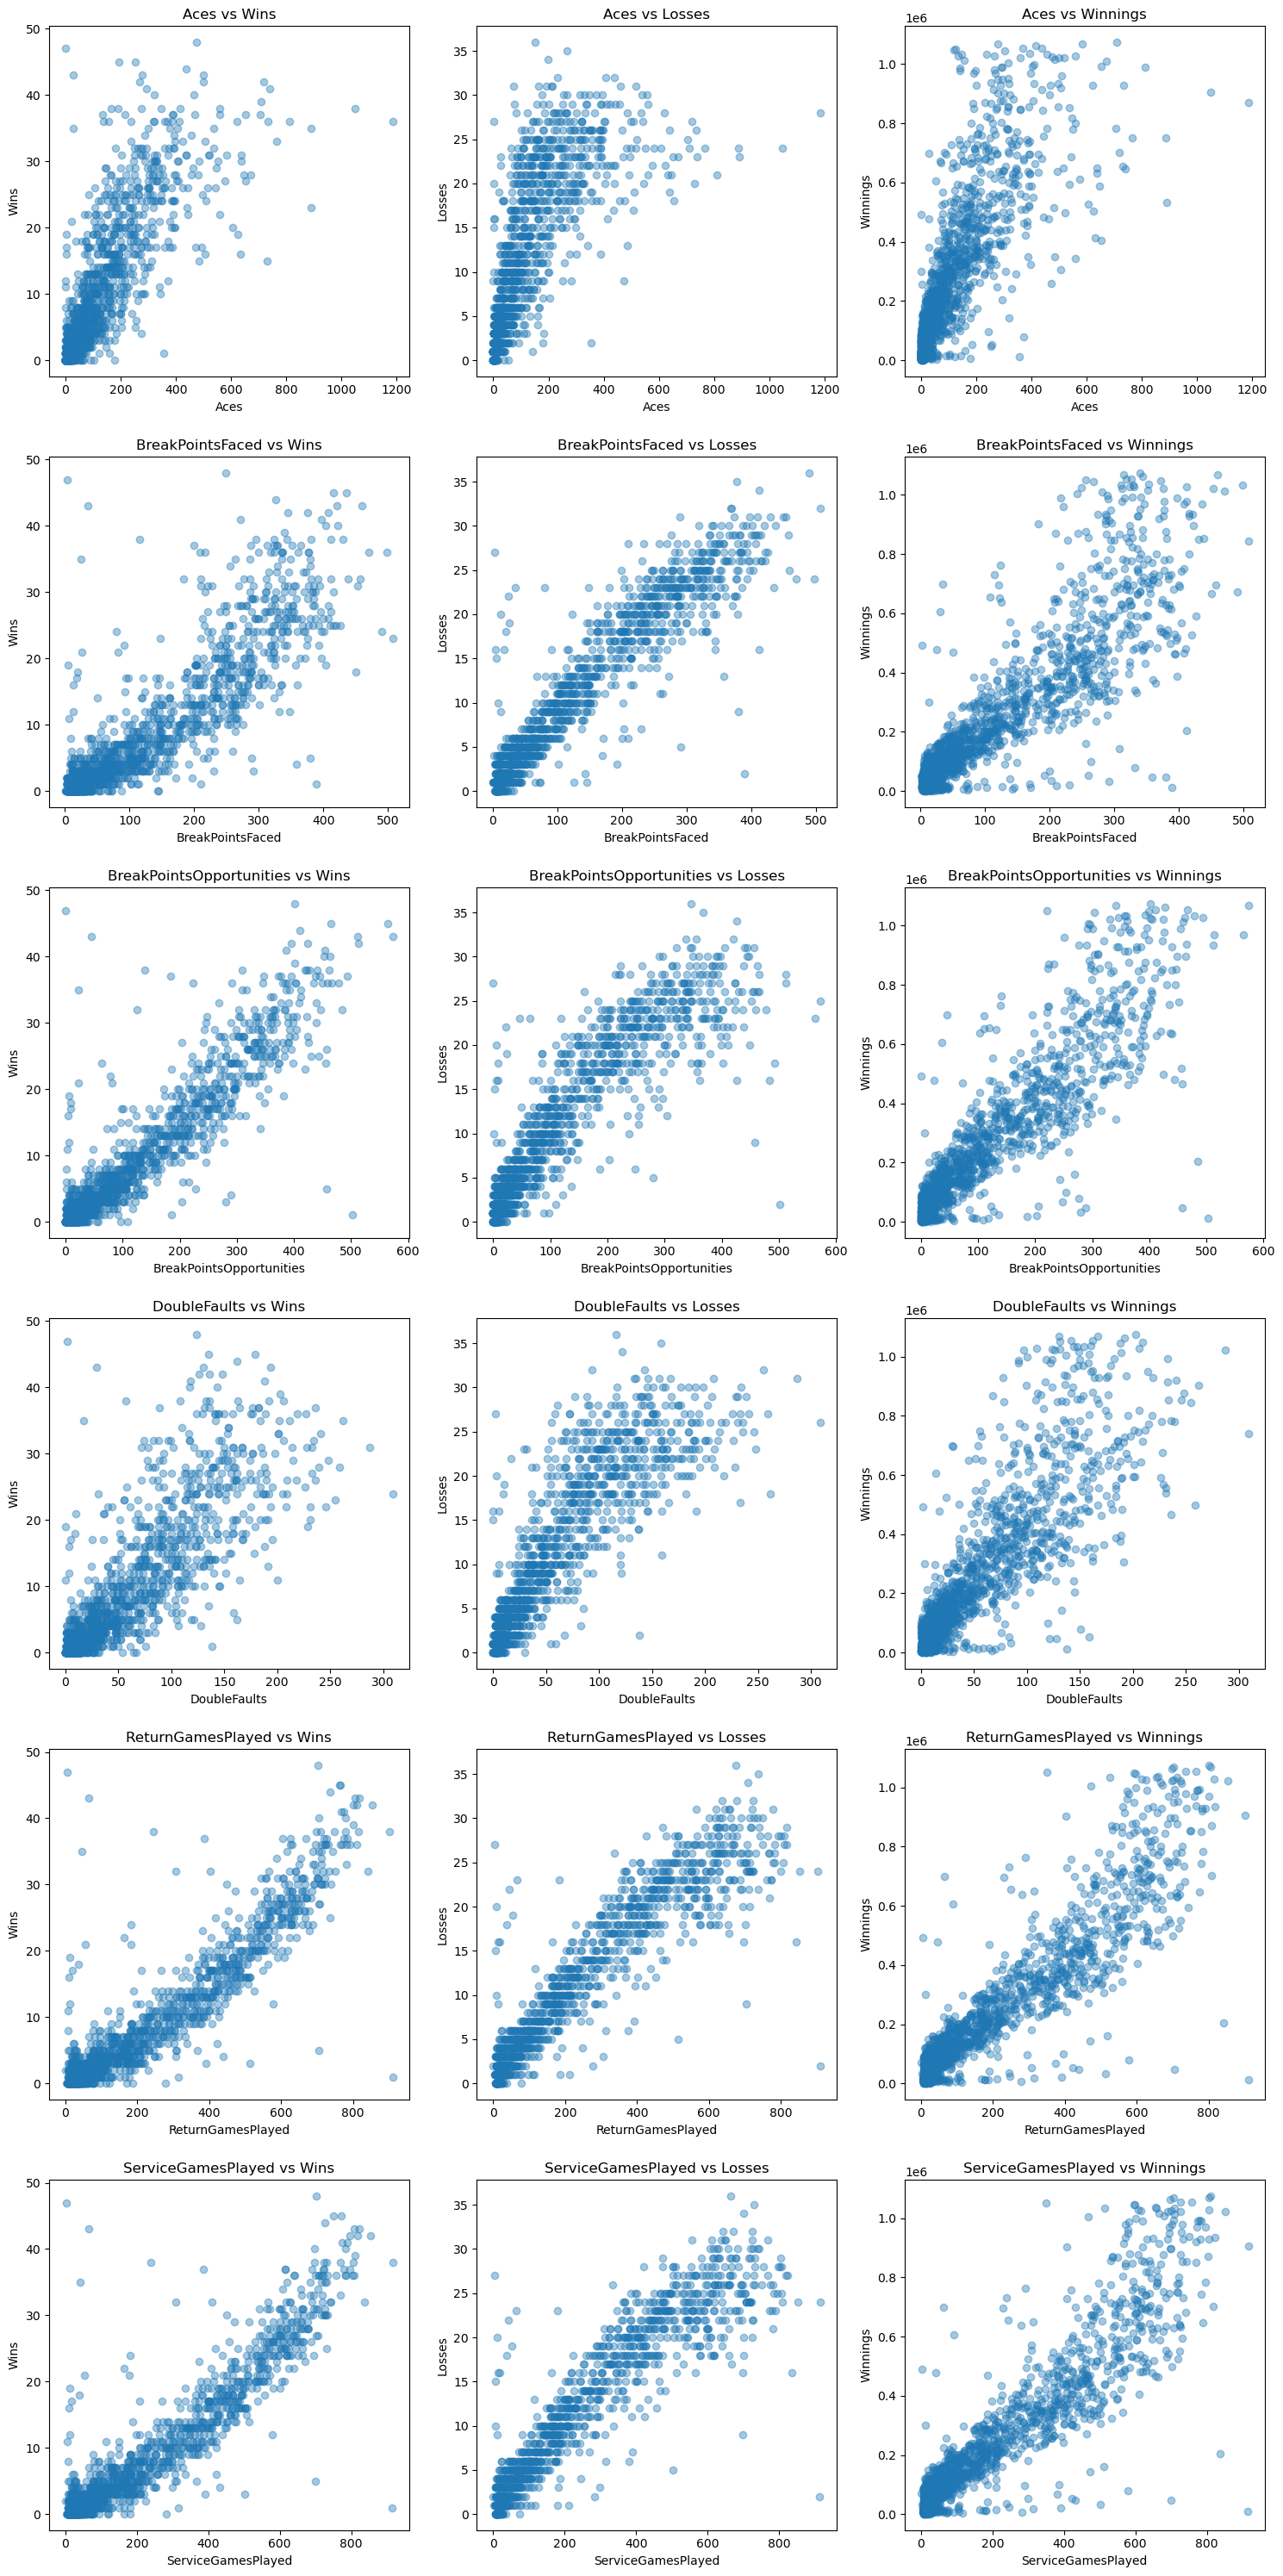

<Figure size 640x480 with 0 Axes>

In [10]:
# for each target, plot the predictor
f = plt.figure()
fig, axes = plt.subplots(6,3, figsize = (15,30))
i = 0 

for target in targets:
    j = 0
    for column in most_correlated:
        axes[j][i].scatter(tennis_df[column], tennis_df[target], alpha=0.4)
        axes[j][i].set_ylabel(target)
        axes[j][i].set_xlabel(column)
        axes[j][i].set_title("{} vs {}".format(column, target))

        j += 1
    i += 1

fig.tight_layout()
plt.show()
plt.clf()

The graphs of each predictor vs each target seem to also indicate a relationship with the most correlated predictors already discovered. However, Aces does not seem to be as correlated.

# Model Development and Testing

This section will include:

- Single Linear Regression 
- Double Linear Regression
- Multi-Linear Regression

Each regression will seek to find the best predictor or combination of predictors using the R^2 score.

In [11]:
# set random state for the rest for the regression
rand_state = 5

In [12]:
# function to find the linear regression for a given target and predictor
def lin_model(predictor, target, r_state):

    # separate the data into training and testing data
    train_test_data = train_test_split(predictor, target, train_size=0.8, test_size = 0.2, random_state=r_state)
    # create the model, train it, and predict the values for test_x
    lr = LinearRegression()
    model = lr.fit(train_test_data[0], train_test_data[2])

    # return the model and train-test data split
    return model, train_test_data 

In [13]:
# function used to find the best single predictor linear regression
def best_single(predictors, target, r_state):

    # declare variables to be used for single linear regression
    best_score = 0
    best_pred = ''
    actuals = []
    predictions = []
    
    # find the best predictor of target
    for column in most_correlated:
        model, tt_split = lin_model(tennis_df[[column]], tennis_df[[target]], r_state)
        new_score = model.score(tt_split[1],tt_split[3])

        # if the new score is better than the best score, then save these new variables
        if new_score > best_score:
            actuals = tt_split[3]
            predictions = model.predict(tt_split[1])
            best_pred = column
            best_score = new_score

    # return best predictor, best R^2 score, actual target, and predicted target
    return best_pred, best_score, actuals, predictions

In [14]:
# function used to find the best double predictor linear regression
def best_double(predictors, target, r_state):
    
    # declare variables to be used for double linear regression
    best_score = 0
    best_pair = []
    actuals = []
    predictions = []
    already_visited = []
    
    # find the best predictor of Wins
    for column in most_correlated:
        already_visited.append(column)
        for column2 in most_correlated:
            if column2 in already_visited:
                continue
    
            # call function and check for best predictor pair based upon R^2
            model, tt_split = lin_model(tennis_df[[column, column2]], tennis_df[[target]], r_state)
            new_score = model.score(tt_split[1],tt_split[3])

            # if the new score is better than the best score, then save these new variables
            if new_score > best_score:
                actuals = tt_split[3]
                predictions = model.predict(tt_split[1])
                best_pair = [column, column2]
                best_score = new_score

    # return best pair of predictors, best R^2 score, actual target, and predicted target
    return best_pair, best_score, actuals, predictions

In [15]:
# function used to find the optimal number of predictors for linear regression based upon the R^2 score
# the attempt list holds the current combination of predictors.
# each combination that is iterated through is unique. (EX: [column1, column2], [column2, column1] does not happen)
def optimal_comb(predictors, pred_comb, target, best_score, r_state):

    # declare variables to store the best predictions and predictor combination
    actuals = []
    predictions = []
    best_comb = []

    # for each predictor in the predictors list
    for i in range(len(predictors)):

        # append predictor to predictor combination
        pred_comb.append(predictors[i])

        # do a linear regression on the predictor combination and target variable
        model, tt_split = lin_model(tennis_df[pred_comb], tennis_df[[target]], r_state)
        new_score = model.score(tt_split[1], tt_split[3])
        ypred = model.predict(tt_split[1])
        
        # if the new linear regression has a better R^2 score
        if new_score > best_score:

            # save the best variables to be returned
            actuals = tt_split[3]
            predictions = ypred
            best_score = new_score
            best_comb = pred_comb.copy()

        # if we get to the end of the predictor list
        if i == predictors[-1]:
            
            # remove predictor from combination
            pred_comb.remove(predictors[i])

            # return variables
            return best_score, actual, prediction, best_comb
            
        else:
            
            # call fucntion to add a new predictor to the combination
            new_score, ytest, ypred, new_pred_comb = optimal_comb(predictors[1+i:], pred_comb, target, best_score, r_state)

            # if the new predictor combination has a better R^2 score
            if new_score > best_score:

                # save the best variables to be returned
                actuals = ytest
                predictions = ypred
                best_score = new_score
                best_comb = new_pred_comb.copy()
                
        # remove predictor from combination
        pred_comb.remove(predictors[i])

    # return variables
    return best_score, actuals, predictions, best_comb

In [18]:
# function to graph Actual vs Predicted targets
def scatter_targets(target_predictors):

    # set the size of the subplots
    f = plt.figure()
    fig, axes = plt.subplots(1,3, figsize = (15,5))
    j = 0

    # for each key value pair, plot the actual values vs the predicted values
    for key, value in target_predictors.items():
        axes[j].scatter(value[1], value[2], alpha=0.4)
        axes[j].set_ylabel(key)
        axes[j].set_xlabel(value[0])
        axes[j].set_title("{} vs {}".format(value[0], key))
        print(key, value[0])

        # increment to next plot
        j += 1

    # show tight layout of plot
    fig.tight_layout()
    plt.show()
    plt.clf()

In [19]:
# single linear regression for most correlated variables

# initialize dicts to be used
target_predictors = {}
best_preds = {}

# find the best predictor for each target variable
for target in targets:

    # get the best predictor and assosciated values
    best_pred, best_score, actuals, predictions = best_single(most_correlated, target, rand_state)

    # save the best predictor and its assosciated values
    target_predictors[target] = [best_pred, actuals, predictions]
    best_preds[target] = best_pred

    # display the best predictor to the console
    print("The best predictor for {} is {} with an R^2 of {}\n".format(target, best_pred, best_score))

The best predictor for Wins is ServiceGamesPlayed with an R^2 of 0.8511503074978238

The best predictor for Losses is BreakPointsFaced with an R^2 of 0.8856892806353748

The best predictor for Winnings is ServiceGamesPlayed with an R^2 of 0.8545653480336243



Wins ServiceGamesPlayed
Losses BreakPointsFaced
Winnings ServiceGamesPlayed


<Figure size 640x480 with 0 Axes>

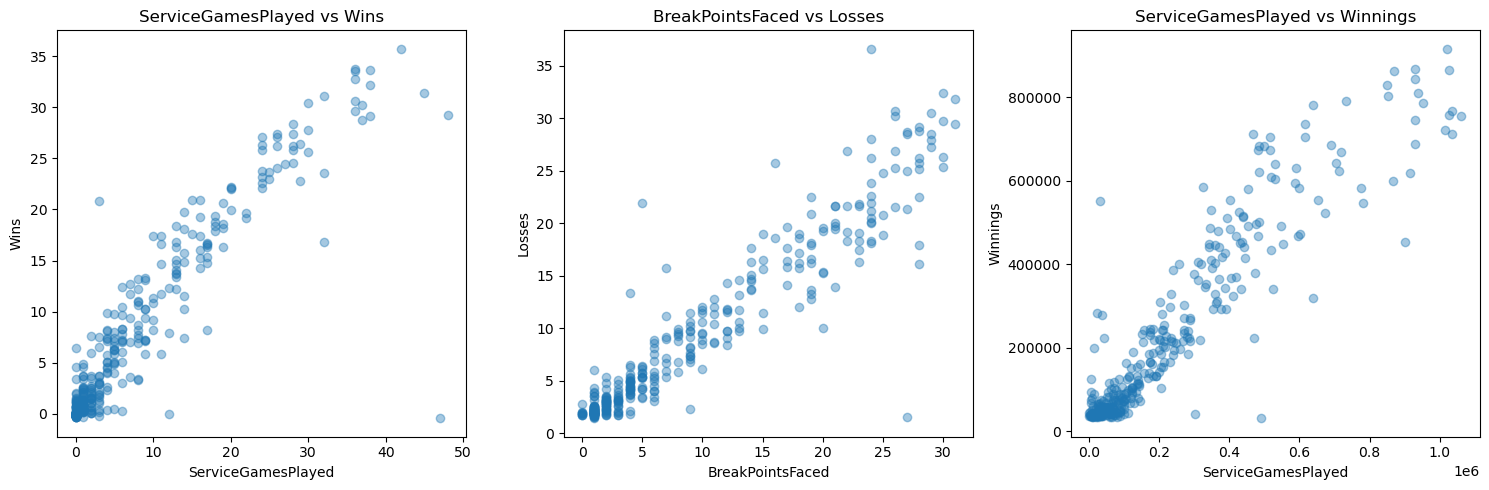

<Figure size 640x480 with 0 Axes>

In [20]:
scatter_targets(target_predictors)

In [21]:
# double regression for most correlated variables

# initialize dicts to be used
target_predictors = {}
best_pairs = {}

# find the best pair of predictors for each target variable
for target in targets:

    # get the best pair of predictors and assosciated values
    best_pair, best_score, actuals, predictions = best_double(most_correlated, target, rand_state)

    # save the best pair of predictors and its assosciated values
    target_predictors[target] = [best_pair, actuals, predictions]
    best_pairs[target] = best_pair

    # display the best pair of predictors to the console
    print("The best predictor for {} is {} with an R^2 of {}\n".format(target, best_pair, best_score))

The best predictor for Wins is ['Aces', 'BreakPointsOpportunities'] with an R^2 of 0.8699699454846846

The best predictor for Losses is ['Aces', 'BreakPointsFaced'] with an R^2 of 0.8968895912875684

The best predictor for Winnings is ['BreakPointsFaced', 'ServiceGamesPlayed'] with an R^2 of 0.8591856375335329



Wins ['Aces', 'BreakPointsOpportunities']
Losses ['Aces', 'BreakPointsFaced']
Winnings ['BreakPointsFaced', 'ServiceGamesPlayed']


<Figure size 640x480 with 0 Axes>

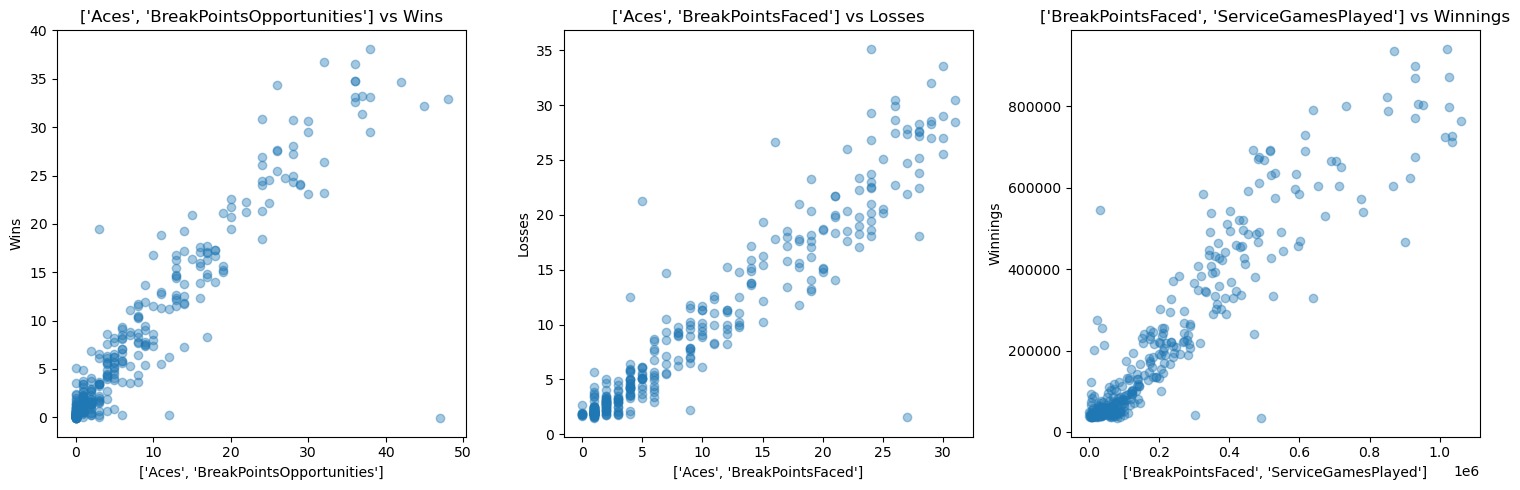

<Figure size 640x480 with 0 Axes>

In [22]:
scatter_targets(target_predictors)

In [23]:
# multi-variable regression for most correlated variables

# initialize dicts to be used
target_predictors = {}
best_combs = {}

# for each target variable
for target in targets:

    # find the best combination of predictors and their associated values
    best_score, actuals, predictions, best_comb = optimal_comb(most_correlated, [], target, 0, rand_state)

    # save the best combination of predictors and its assosciated values
    target_predictors[target] = ["Combination", actuals, predictions]
    best_combs[target] = best_comb

    # display the combination pair of predictors to the console
    print("The best combination of predictors for {} is {} with an R^2 score of {}\n".format(target, best_comb, np.round(best_score,3)))

The best combination of predictors for Wins is ['BreakPointsFaced', 'BreakPointsOpportunities', 'DoubleFaults', 'ReturnGamesPlayed', 'ServiceGamesPlayed'] with an R^2 score of 0.883

The best combination of predictors for Losses is ['BreakPointsFaced', 'BreakPointsOpportunities', 'ReturnGamesPlayed'] with an R^2 score of 0.908

The best combination of predictors for Winnings is ['BreakPointsFaced', 'BreakPointsOpportunities', 'ServiceGamesPlayed'] with an R^2 score of 0.863



Wins Combination
Losses Combination
Winnings Combination


<Figure size 640x480 with 0 Axes>

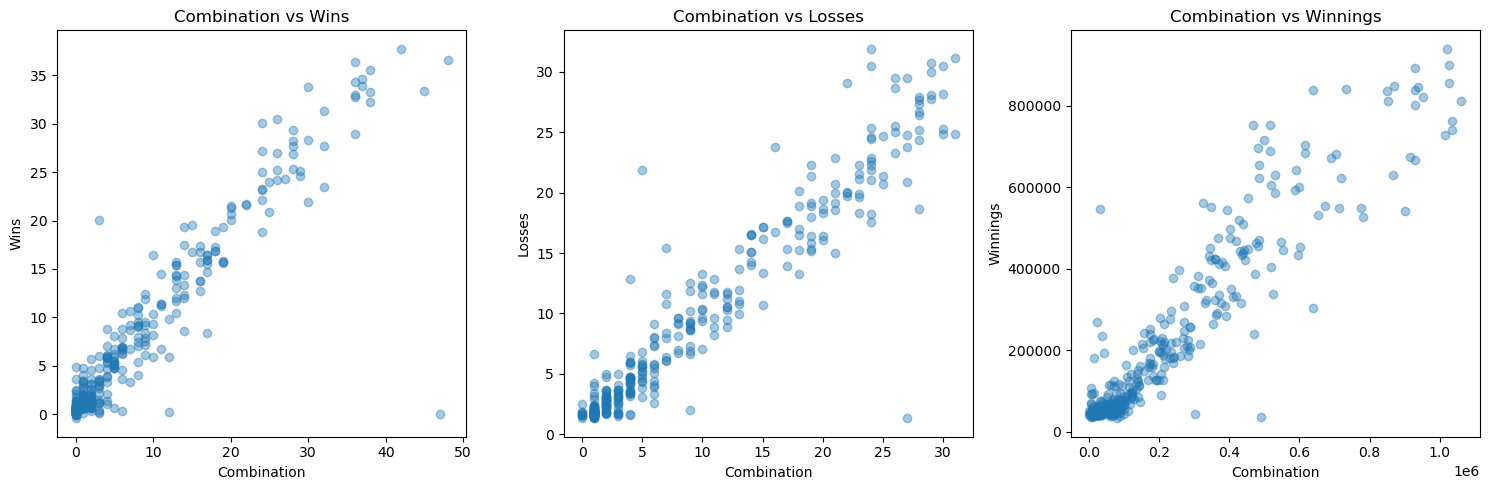

<Figure size 640x480 with 0 Axes>

In [24]:
scatter_targets(target_predictors)

# Conclusion

After doing a linear analysis on the most correlated predictors, we found suitable combinations of predictors that provided an R^2 score of above 0.8.

- For Wins, the best combination was BreakPointsFaced, BreakPointsOpportunities, DoubleFaults, ReturnGamesPlayed, and ServiceGamesPlayed, which altogether explains 88% of the variance. 

- For Losses, the best combination was BreakPointsFaced, BreakPointsOpportunities, and ReturnGamesPlayed, which altogether explains 90% of the variance. 

- For Winnings, the best combination was BreakPointsFaced, BreakPointsOpportunities, and ServiceGamesPlayed, which altogether explains 86% of the variance.
